# Weather Perception Visualizations

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def print_column_info(df, col_name):
    """
    Print range, completeness, and data type of column with provided name and dataframe
    """
    print(f'COLUMN {col_name} | Range: {df[col_name].min()} to {df[col_name].max()} | NAs: {df[col_name].isna().sum()} | Type: {df[col_name].dtype}')

In [3]:
# load data
df = pd.read_csv('../../data/raw/rawdata_new.csv')

## Visualizations

### Do farmers think climate change will have consequences for agriculture in Switzerland?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [4]:
# is the data complete, in the expected range, and of the expected type?
print_column_info(df, 'cons_general')

# quick peek at the relevant column
df['cons_general'].head(5)

COLUMN cons_general | Range: 1 to 5 | NAs: 0 | Type: int64


0    4
1    5
2    4
3    4
4    5
Name: cons_general, dtype: int64

Yes, the data is complete, and it is an integer ranging from 1 to 5 inclusive as expected.

<AxesSubplot:xlabel='cons_general', ylabel='Count'>

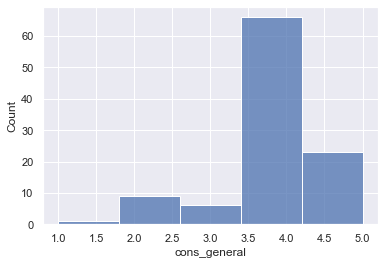

In [5]:
sns.histplot(data=df, x='cons_general', bins=5)

Most farmers expecte negative (rating 4) or very negative consequences (rating 5) of climate change on Swiss agriculture.

I wonder if that is representative of farmers overall, or if there is a self-selection bias - farmers who are concerned about climate change were more likely to take the survey in the first place.

### Do farmers think climate change will have consequences for the economic development of their farm?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [6]:
# is the data complete, in the expected range, and of the expected type?
print_column_info(df, 'cons_farm')

# quick peek at the relevant column
df['cons_farm'].head(5)

COLUMN cons_farm | Range: 1 to 5 | NAs: 0 | Type: int64


0    4
1    5
2    4
3    4
4    4
Name: cons_farm, dtype: int64

Yes, the data is complete, and it is an integer ranging from 1 to 5 inclusive as expected.

<AxesSubplot:xlabel='cons_farm', ylabel='Count'>

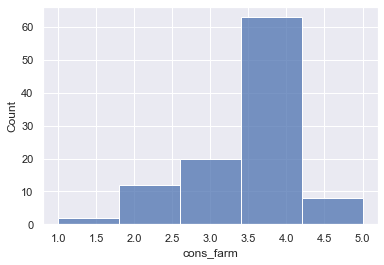

In [7]:
sns.histplot(data=df, x='cons_farm', bins=5)

Most farmers think that climate change will have negative consequences (rating 4) or no consequences (rating 3) for the economic development of their farm.

To me, this suggests that farmers are very concerned about climate change consequences on agriculture in their region, and are concerned (but a little bit less!) about climate change consequences on their farm. It could also be that they are worried about non-economic consequences, too, though. Interesting!

### Do farmers see changing weather patterns?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [8]:
# is the data complete, in the expected range, and of the expected type?
for col_index in np.arange(33,39):
    print_column_info(df, df.columns[col_index])

# quick peek at the relevant columns
df.iloc[0:5, 33:39]

COLUMN percep_hail | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_drought | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_frost | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_heavyrain | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_longrain | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_heat | Range: 1 to 3 | NAs: 0 | Type: int64


,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat
0,2,2,2,1,2,2
1,3,2,2,3,3,3
2,2,3,1,1,1,3
3,2,2,2,2,2,2
4,2,3,2,2,1,3


Yes, the data is complete, and all columns are integers ranging from 1 to 3 inclusive as expected.

In [9]:
# create new dataframe with perception data
percep_df = df.iloc[:, 33:39].copy()
# reshape from wide to long format
percep_df = pd.melt(percep_df, var_name='weather_event', value_name='rating')
# rename variables
percep_df['weather_event'] = [t[7:] for t in percep_df['weather_event']]
# check out result
percep_df.sample(5)

,weather_event,rating
610,heat,2
145,drought,3
256,frost,2
148,drought,2
255,frost,1


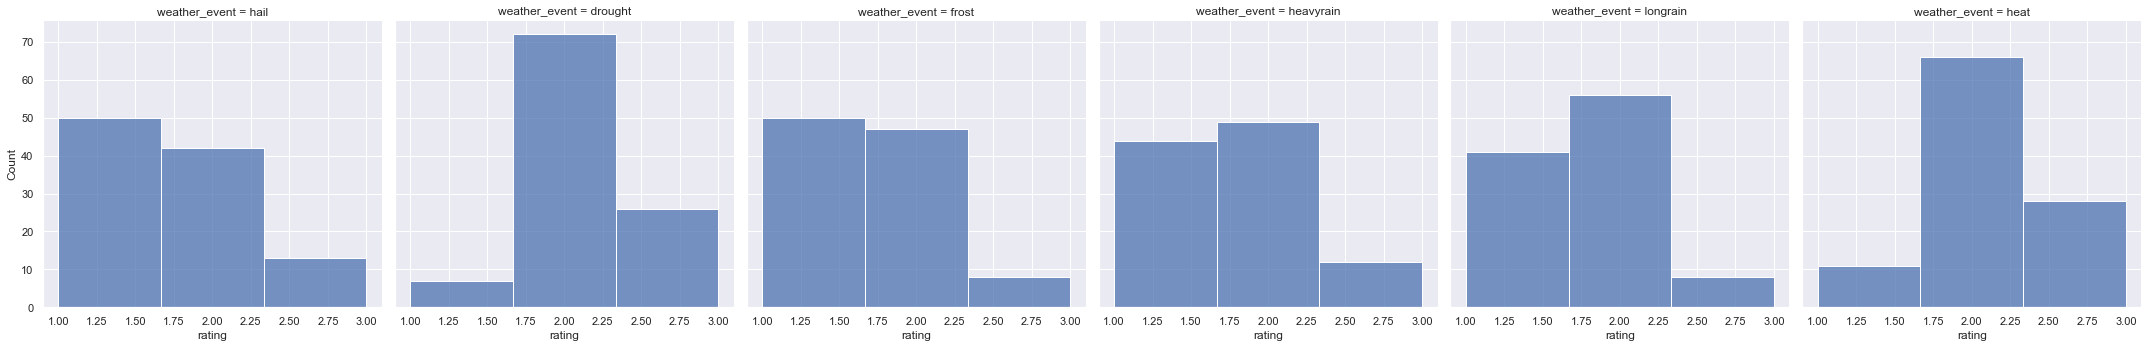

In [10]:
# visualize pereption for each event
sns.displot(percep_df, x='rating', col='weather_event', bins=3)

The question reads: How did you perceive the frequency of extreme weather events over the past 10 years on your farm? A rating of 1 indicates no change, 2 indicates increase or decrease, 3 indicates strong increase or strong decrease. It seems that farmers see the strongest changes in drought and heat, and the weakest changes in hail and frost. There aren't any polarizing patterns here, either, where farmers think there is a strong change or no change and few see a moderate change.

Now, I'll check out farmers' average rating to this group of questions, and see whether farmers are seeing changes in general. I wonder if some farmers think more events are changing than other farmers do. Ill aggregate by the mean to keep the same interpretation - if a farmer has a rating of 1, then they see no change in all events; if a farmer has a rating of 3, then they see strong changes in all events.

In [11]:
# create perception average column
df['percep_avg'] = np.mean(df.iloc[:, 33:39], axis=1)
# quick check of the new column
print_column_info(df, 'percep_avg')
# check out a sample of the data
df['percep_avg'].sample(5)

COLUMN percep_avg | Range: 1.0 to 3.0 | NAs: 0 | Type: float64


16    1.666667
31    2.000000
14    1.666667
19    1.500000
74    2.333333
Name: percep_avg, dtype: float64

<AxesSubplot:xlabel='percep_avg', ylabel='Count'>

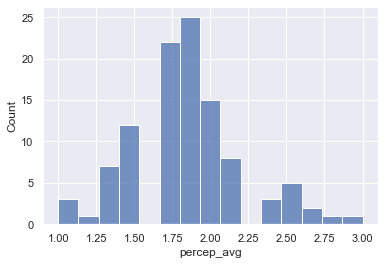

In [12]:
sns.histplot(data=df, x='percep_avg')

It's a fairly normal looking distribution. Most farmers have average ratings around 2 and report an increase or decrease in weather events over the last decade on their farm. Few farmers have average ratings of 1 or 3, reporting no or strong increases in all weather events.